Project Title: Road Traffic Severity Classification

Project by: Benson Kinyua

## Introduction

With the increasing of road traffic infrastructures, motor vehicles, drivers, and traffic flow, the role of road traffic in supporting and guiding economic and social development is becoming more and more obvious. As a result, road traffic safety has increasingly become a key issue in concerning the safety of people’s lives and property, as well as affecting the quality and efficiency of economic and social development. Road traffic accidents are the process of simultaneous damage of people or things, which caused by the coupling imbalance of dynamic and static factors such as human, vehicle, road, and environment. Therefore, it is necessary to study the influencing factors, as well as the classification and identification model of the severity of road traffic accident, so as to pave the way for improving the safety level of road traffic.

## Problem Statement

This is a multi-class classification problem where we are predicting the severity of accident :
* Slight Injury
* Fatal Injury
* Serious Injury

based on the other 31 features.

##  Description

This data set is collected from **Addis Ababa Sub-city Police Departments** for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident.

In [9]:
# for data wrangling
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


from collections import Counter

# for statistics and metrics
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)


# for algorithms
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# SHAP
import shap

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [13]:
#Import/Read the file
data = pd.read_csv(r'C:\Users\admin\Desktop\engineer projects\RTA-Accident_Severity-Classification-Deployment\Dataset\RTA Dataset.csv')
# preview the first 5 rows
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [14]:
# preview the last 5 rows
data.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


Exploratory Data Analysis

In [16]:
# shape of the dataset
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 12316 rows and 32 columns


In [17]:
# view the column names
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [18]:
# view the data types of each column
data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [19]:
# check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [20]:
# checking for any missing values in the dataset.
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [27]:
# check description of the data
data.describe().style.background_gradient(cmap='nipy_spectral')

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [25]:
# check description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [28]:
# check description of the data
data.describe(include=['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [29]:
# checking the distribution of the target
data['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

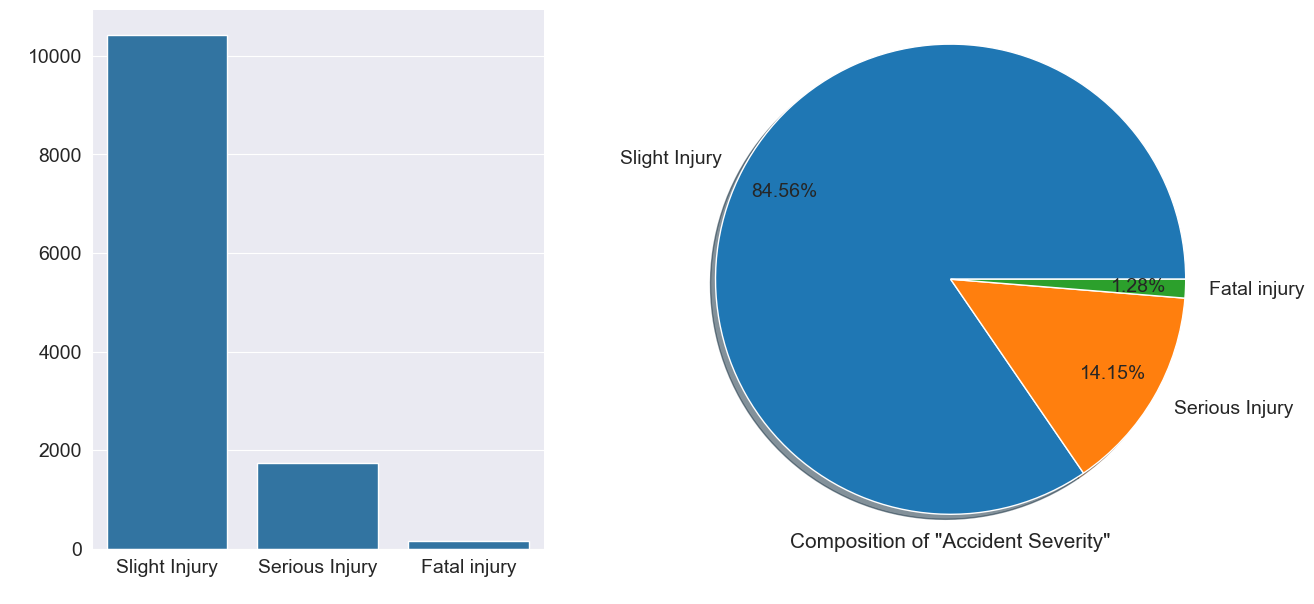

In [30]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=data["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(data["Accident_severity"].value_counts(),
        labels=list(data["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [31]:
# checking the distribution of various features
data['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

In [32]:
# checking the distribution of various features
data['Defect_of_vehicle'].value_counts()

Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64

In [33]:
# Extracting hour and minute from timestamp.

data['hour'] = pd.to_datetime(data['Time']).dt.hour
data['minute'] = pd.to_datetime(data['Time']).dt.minute

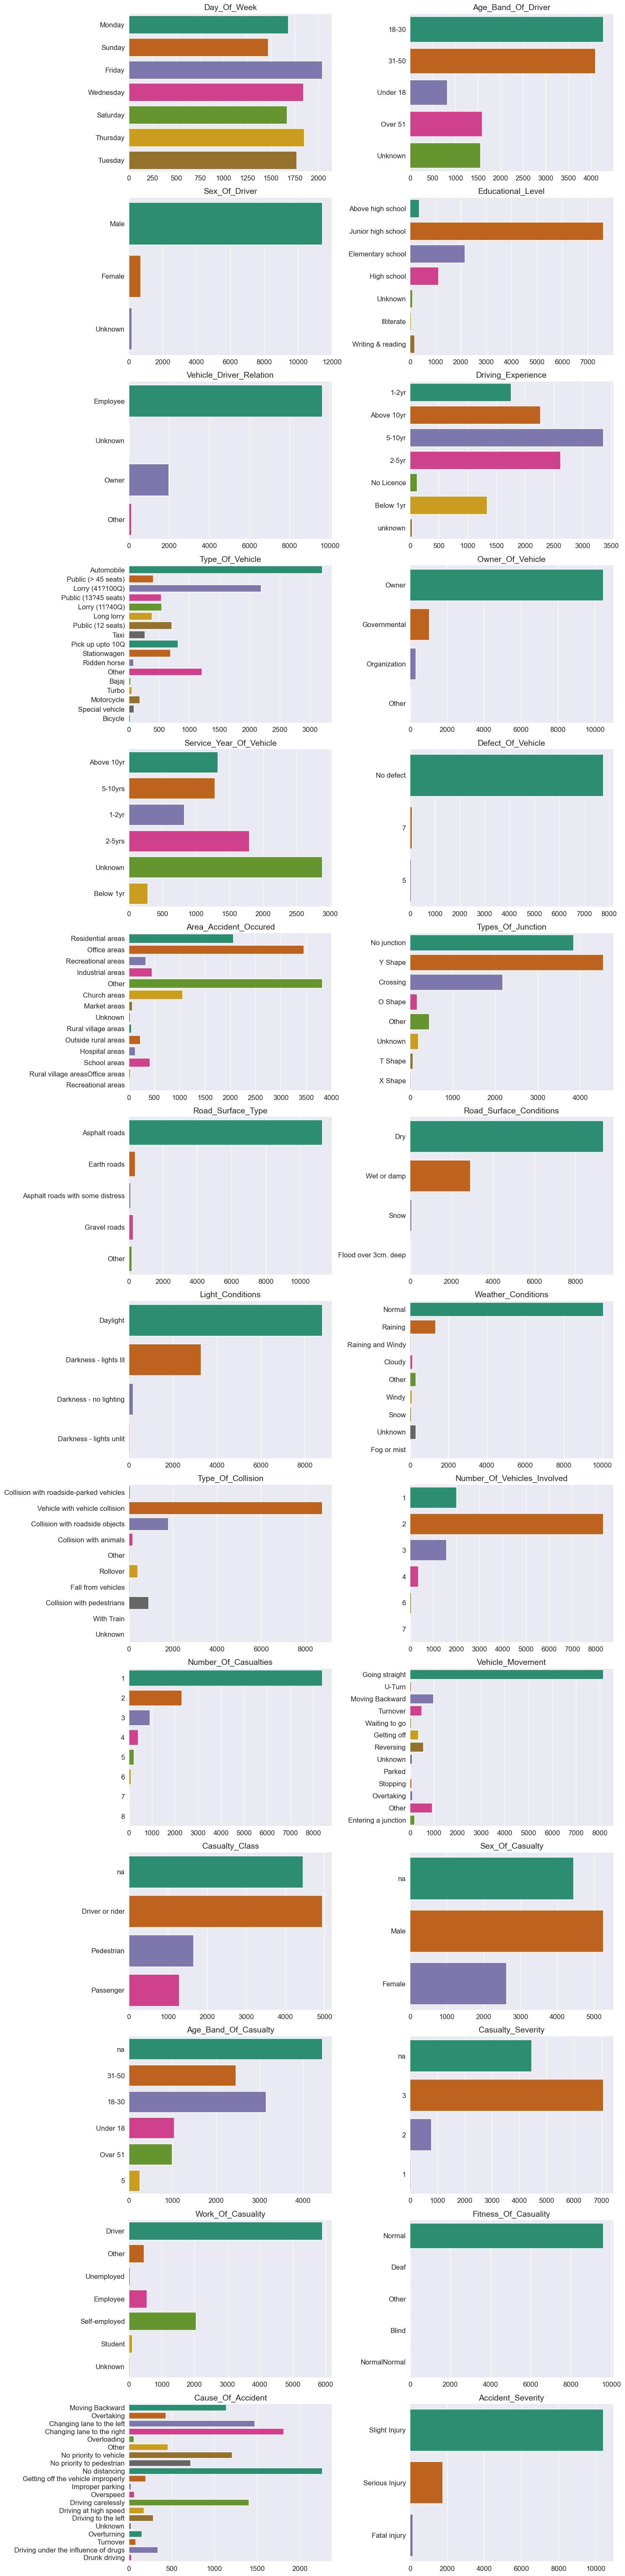

In [37]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in data.drop(['Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement','Time','hour','minute'], axis=1):
    if plotnumber <= data.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=data, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

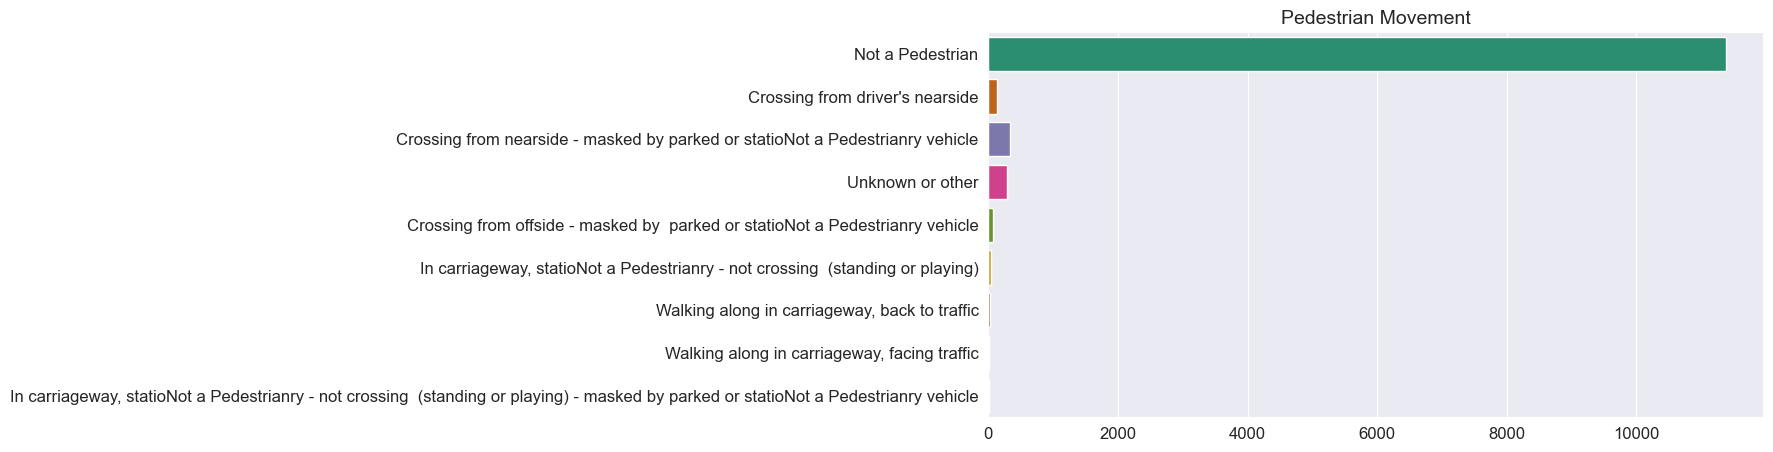

In [38]:
# Checking the Pedestrian Movement column

plt.figure(figsize=(10,5))
sns.countplot(data=data, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

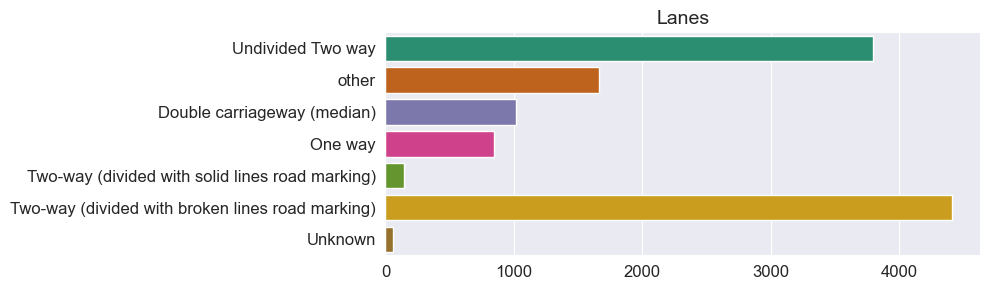

In [39]:
# Checking the Lanes_or_Medians column
plt.figure(figsize=(10,3))
sns.countplot(data=data, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()


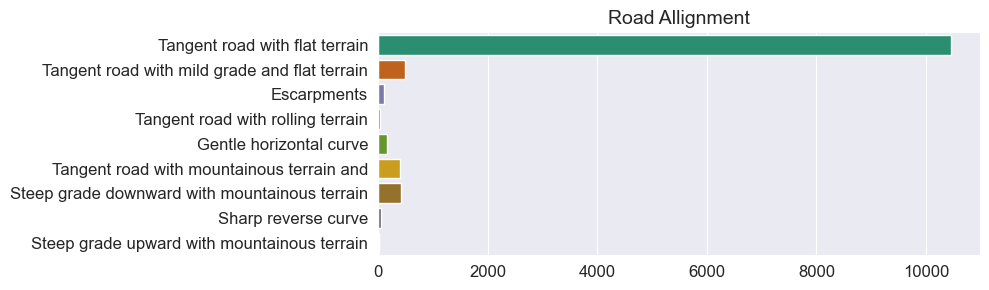

In [40]:
# Checking the Road_allignment column
plt.figure(figsize=(10,3))
sns.countplot(data=data, y='Road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

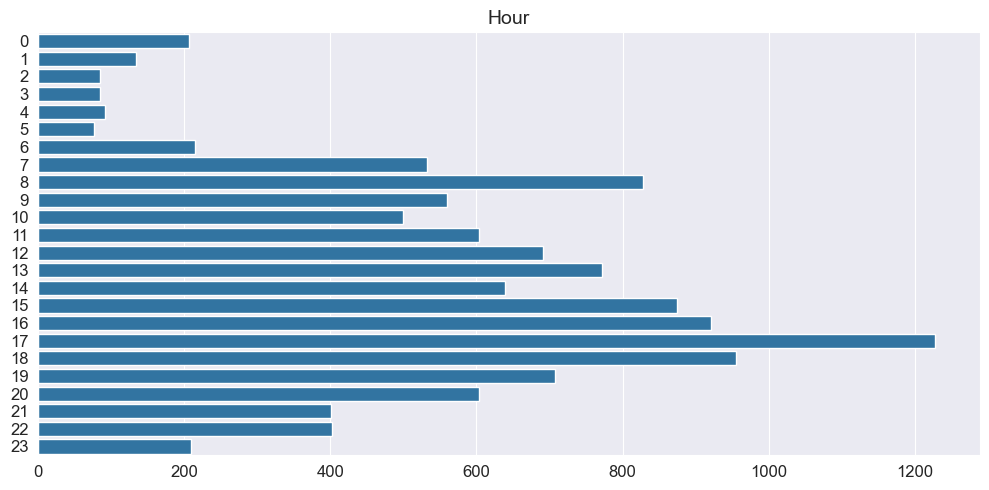

In [41]:
# Checking the hour column
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

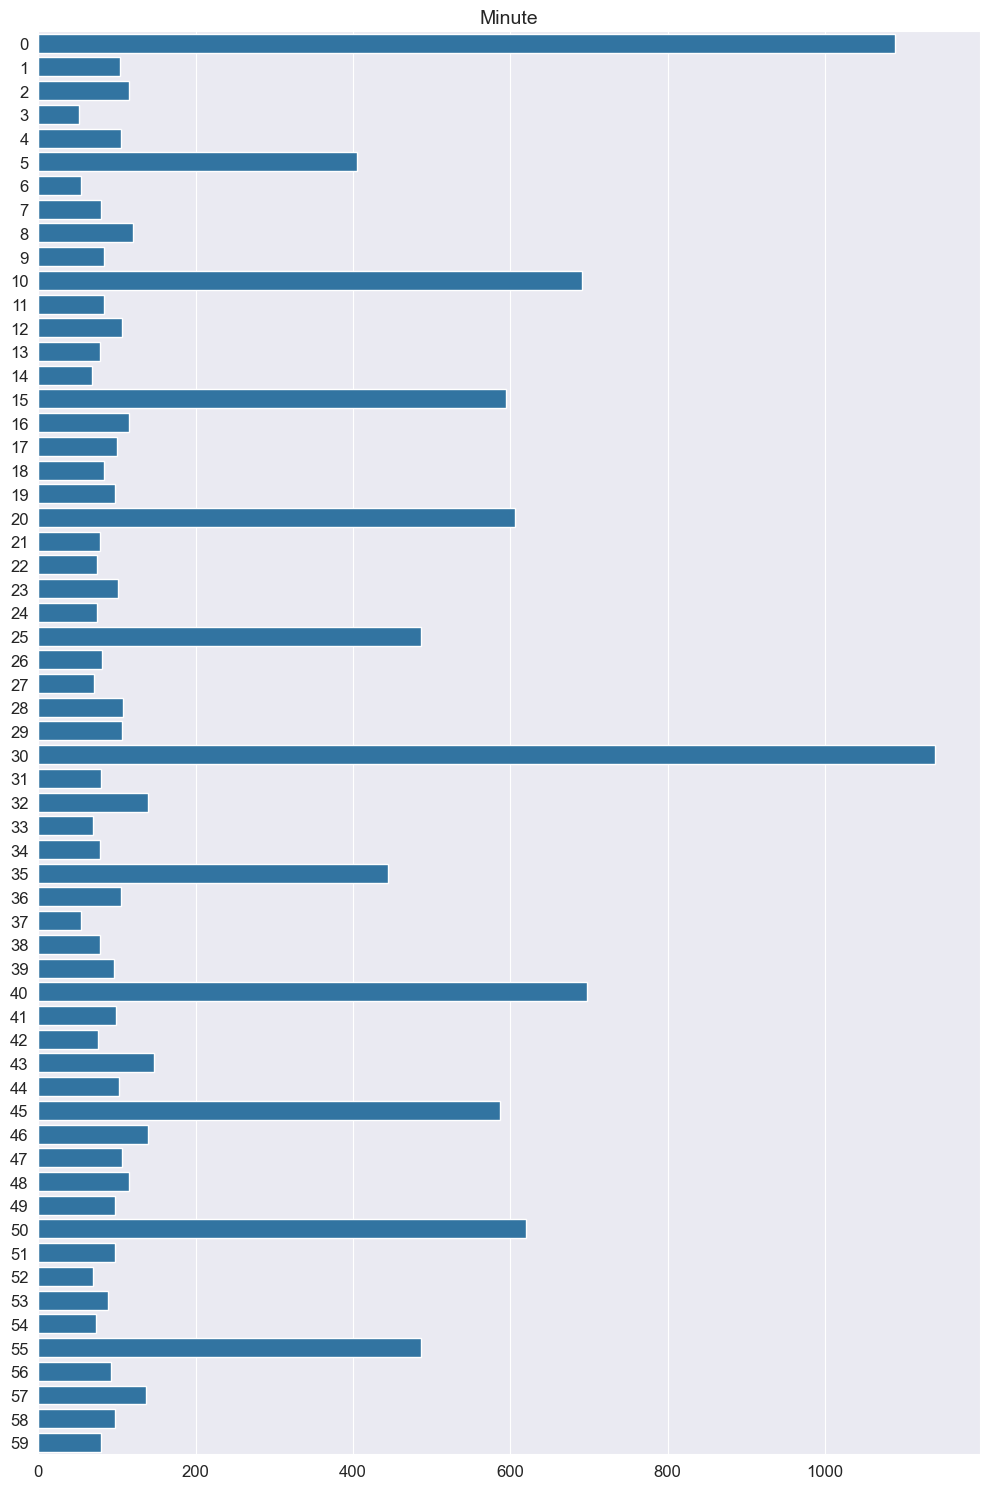

In [42]:
# Checking the minute column
plt.figure(figsize=(10,15))
sns.countplot(data=data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

Observations:

1. Most of the accidents occured on Fridays, the least being sunday.
2. Age band of the drivers commiting the accidents around 18-30 years of age.
3. Sex of the accident commiting drivers Males mostly

In [43]:
# Extracting hour and minute from timestamp.
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [44]:
# Applying the function
data['minute'] = data['minute'].apply(lambda x: convert_minutes(x))

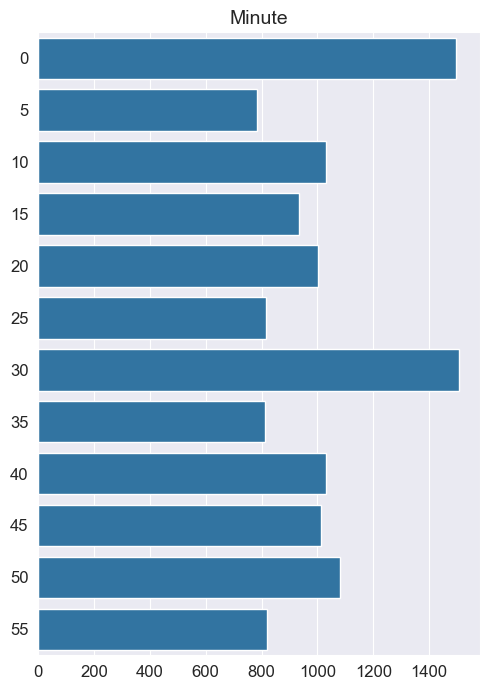

In [46]:
# Checking the minute column
plt.figure(figsize=(5,7))
sns.countplot(data=data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [62]:
num_cols = data.dtypes[data.dtypes == 'int64'].index.tolist() # Numerical
cat_cols = data.dtypes[data.dtypes != 'int64'].index.tolist() # Categorical
data[cat_cols] 

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,2,1,2,1,1,1,1,4,4,3,10,3,6,2,1,1,4,3,4,2,2,3,4,3,6,4,1,3,6,10,Slight Injury,18,2
1,2,2,2,5,1,4,12,4,3,3,7,5,6,2,1,1,4,3,9,2,2,3,4,3,6,4,1,3,6,17,Slight Injury,18,2
2,2,1,2,5,1,1,6,4,6,3,2,7,6,2,1,1,4,3,3,2,2,3,1,2,2,3,1,3,6,1,Serious Injury,18,2
3,4,1,2,5,1,3,12,1,6,3,7,7,7,8,3,1,1,3,9,2,2,3,3,1,1,3,1,3,6,2,Slight Injury,2,3
4,4,1,2,5,1,2,1,4,3,3,5,7,6,8,1,1,1,3,9,2,2,3,4,3,6,4,1,3,6,17,Slight Injury,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,7,2,2,5,1,2,5,4,6,3,6,5,6,2,1,1,4,3,9,2,1,3,4,3,6,4,1,3,6,11,Slight Injury,17,4
12312,4,5,2,2,1,3,1,4,6,3,6,3,1,2,1,1,4,3,9,2,1,5,4,3,6,4,1,3,6,11,Slight Injury,19,1
12313,4,3,2,5,1,3,2,4,2,3,6,3,8,2,1,1,4,3,9,1,1,5,1,2,2,3,1,3,6,2,Serious Injury,14,12
12314,4,1,1,5,1,4,6,4,2,3,7,5,8,2,1,1,1,3,9,2,1,5,4,3,6,4,1,3,6,6,Slight Injury,14,12


In [48]:
data[num_cols]

,Number_of_vehicles_involved,Number_of_casualties,minute
0,2,2,5
1,2,2,5
2,2,2,5
3,2,2,10
4,2,2,10
...,...,...,...
12311,2,1,15
12312,2,1,0
12313,1,1,55
12314,2,1,55


In [49]:
# Dropping the time column

data.drop('Time', axis=1, inplace=True)

In [50]:
# Imputing the missing values
data.isna().sum()[data.isna().sum() != 0]

Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

Handling Missing values through imputation

In [66]:
# Imputing the missing values
impute_cols = [x for x in data.isna().sum()[data.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = data[feat].mode()[0]
    data[feat].fillna(mode, inplace=True)

In [67]:
data.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

Encoding

In [54]:
# Encoding the ordinal features
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(data, data.drop(['Accident_severity'], axis=1).columns)
df.shape
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,2,1,2,1,1,1,1,4,4,3,10,3,6,2,1,1,4,3,4,2,2,3,4,3,6,4,1,3,6,10,Slight Injury,18,2
1,2,2,2,5,1,4,12,4,3,3,7,5,6,2,1,1,4,3,9,2,2,3,4,3,6,4,1,3,6,17,Slight Injury,18,2
2,2,1,2,5,1,1,6,4,6,3,2,7,6,2,1,1,4,3,3,2,2,3,1,2,2,3,1,3,6,1,Serious Injury,18,2
3,4,1,2,5,1,3,12,1,6,3,7,7,7,8,3,1,1,3,9,2,2,3,3,1,1,3,1,3,6,2,Slight Injury,2,3
4,4,1,2,5,1,2,1,4,3,3,5,7,6,8,1,1,1,3,9,2,2,3,4,3,6,4,1,3,6,17,Slight Injury,2,3


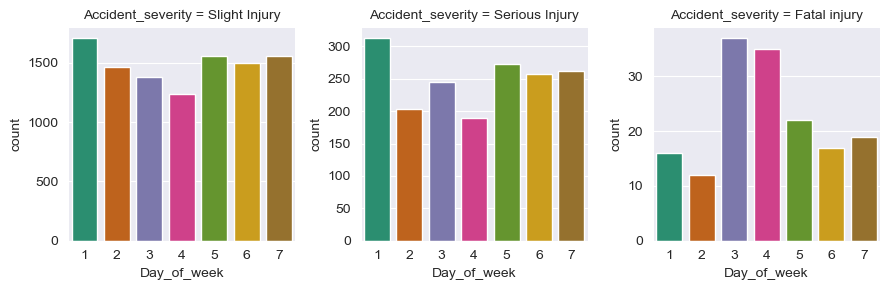

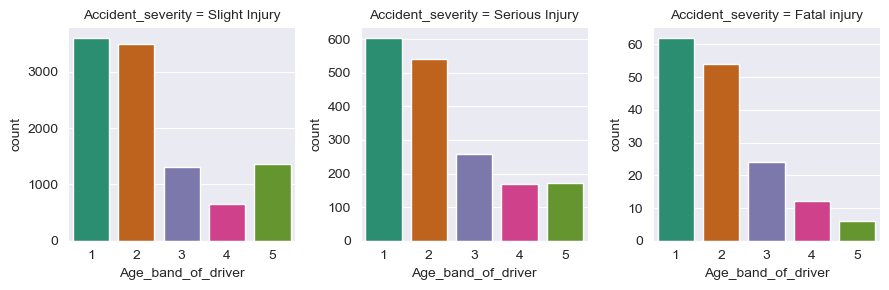

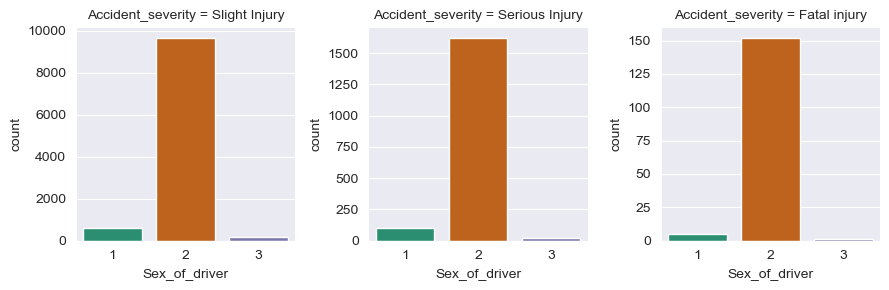

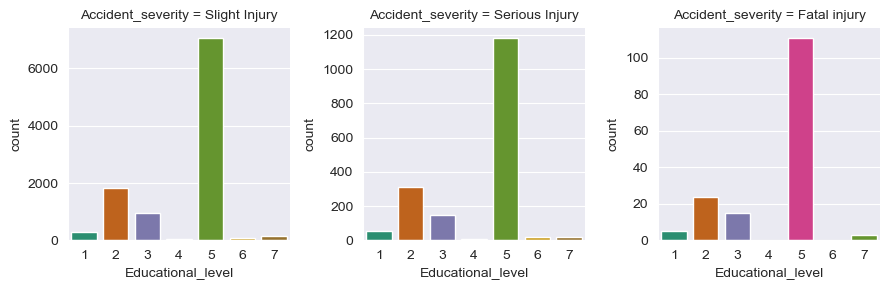

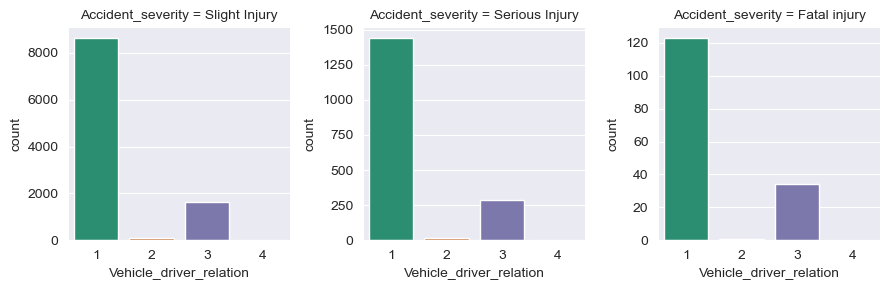

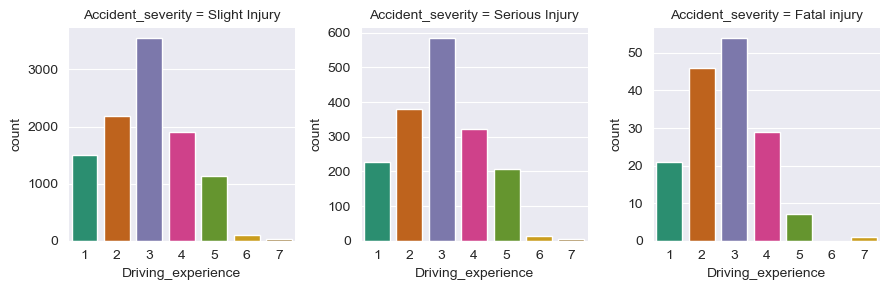

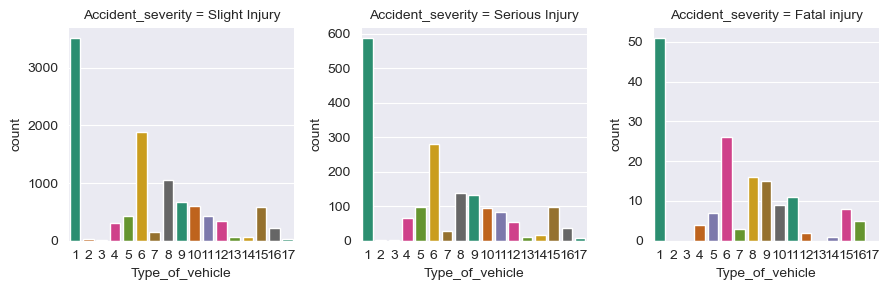

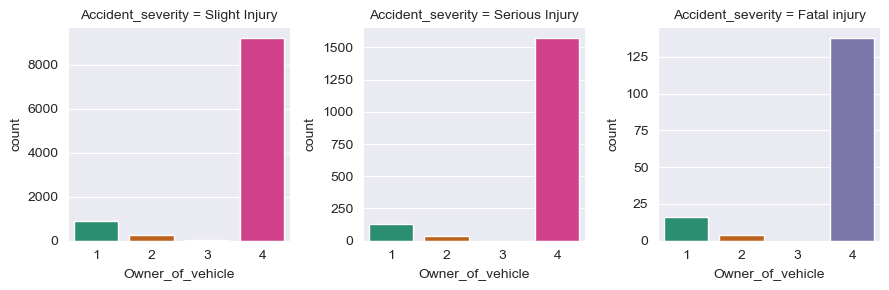

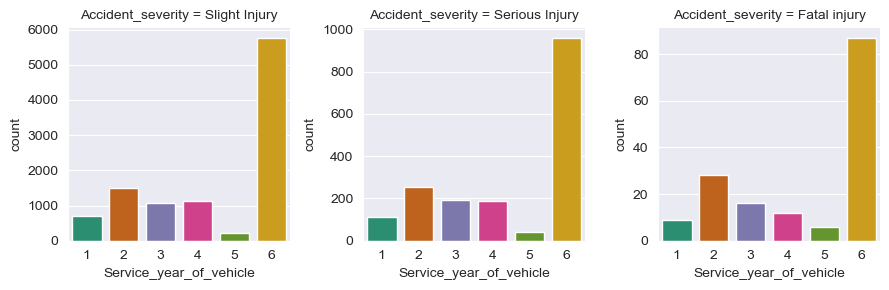

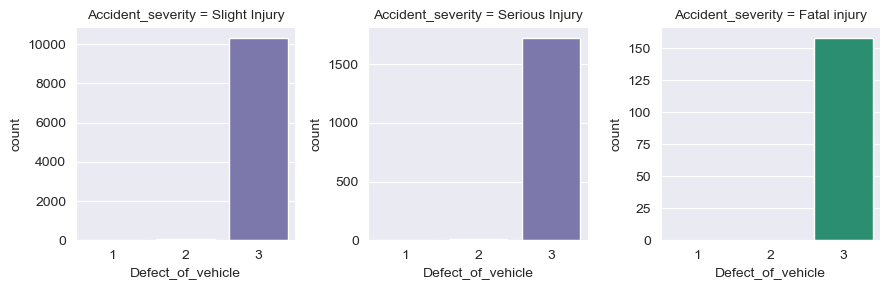

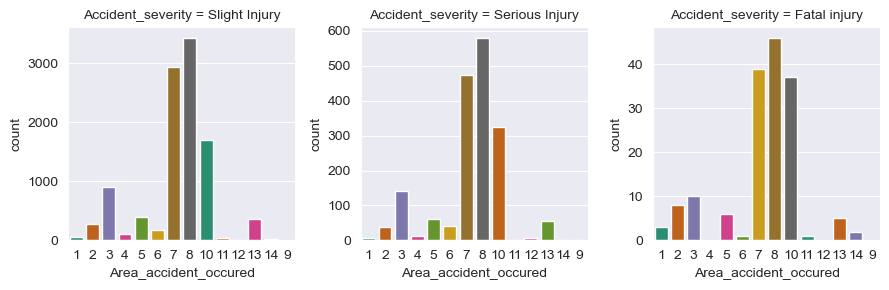

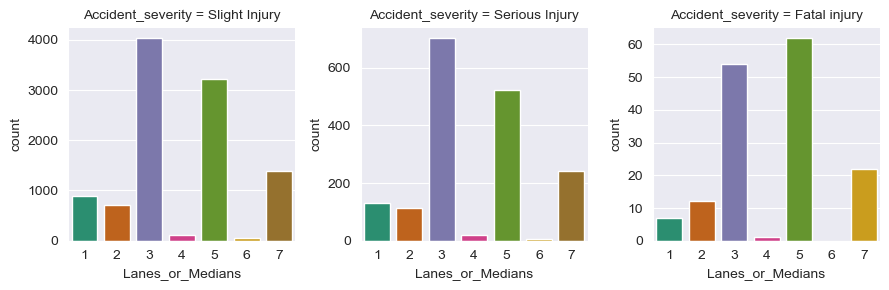

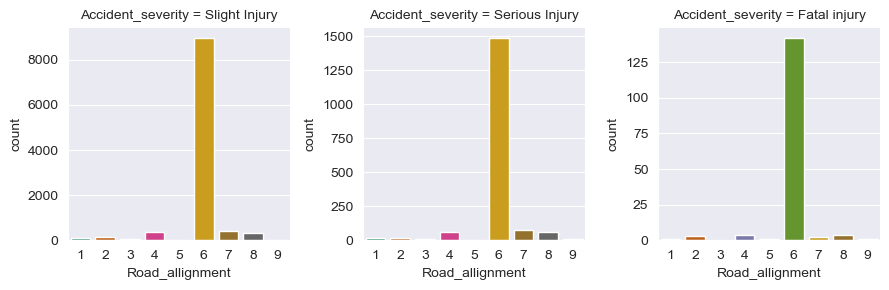

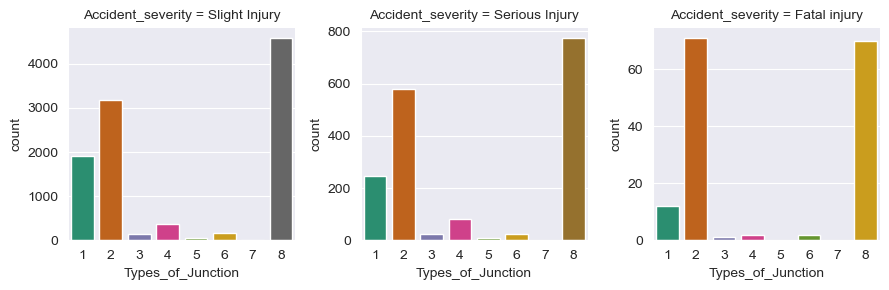

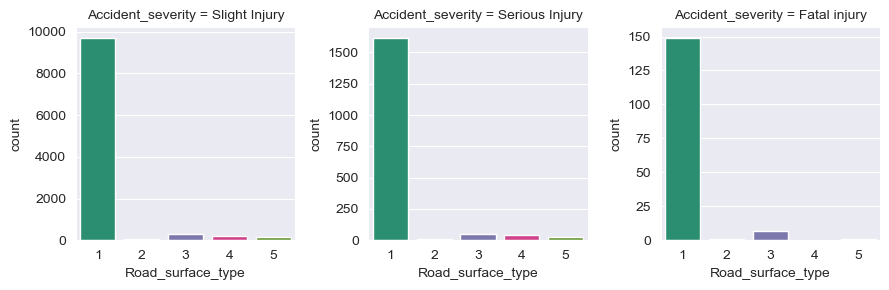

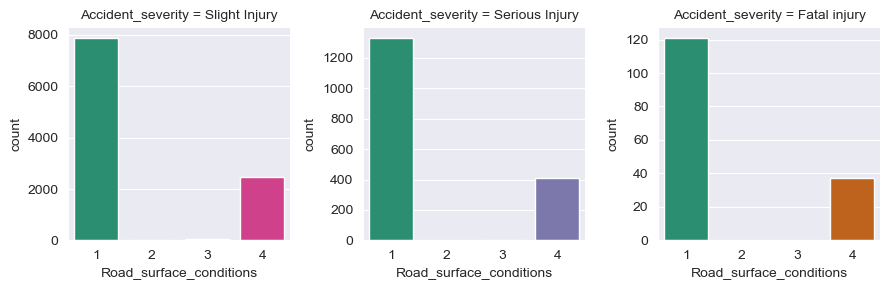

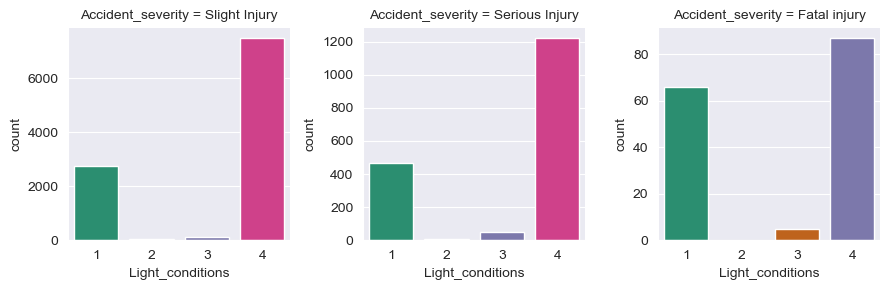

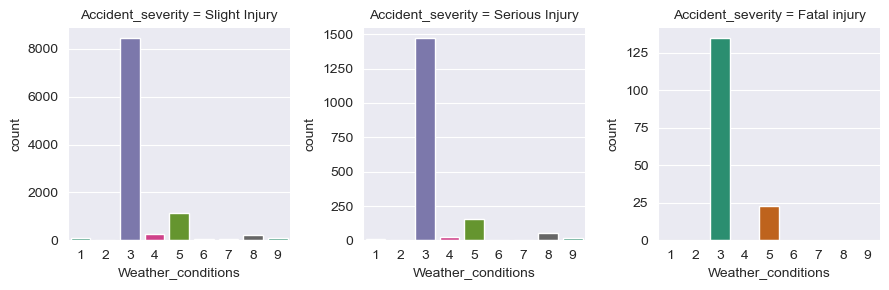

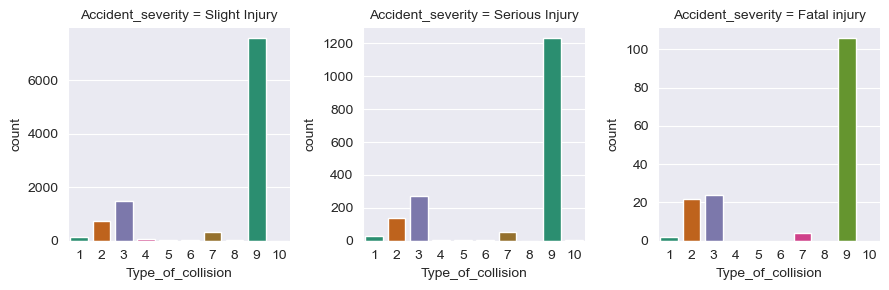

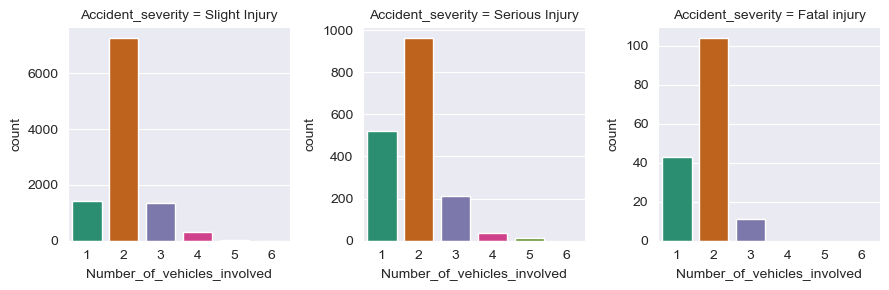

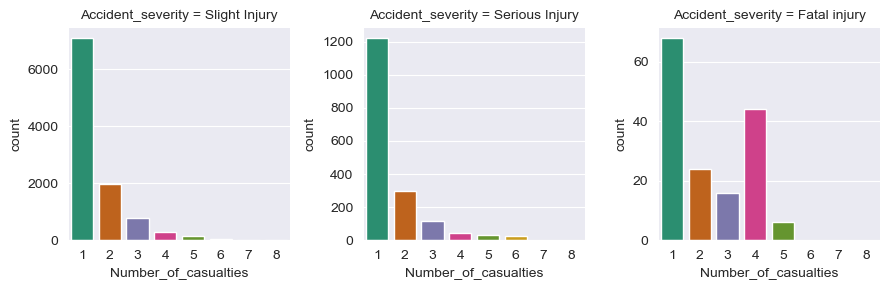

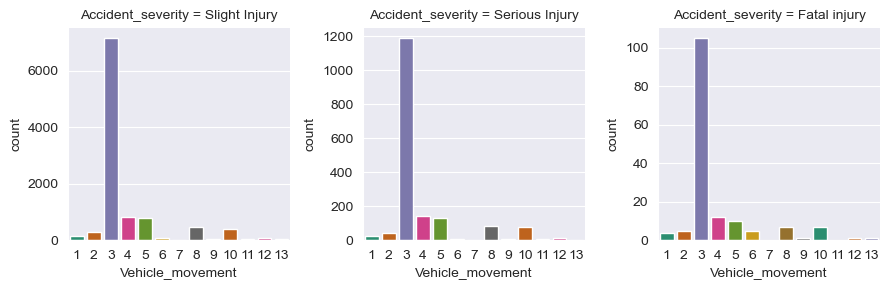

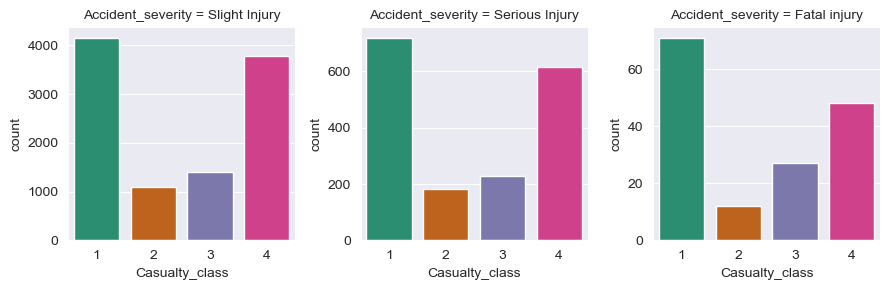

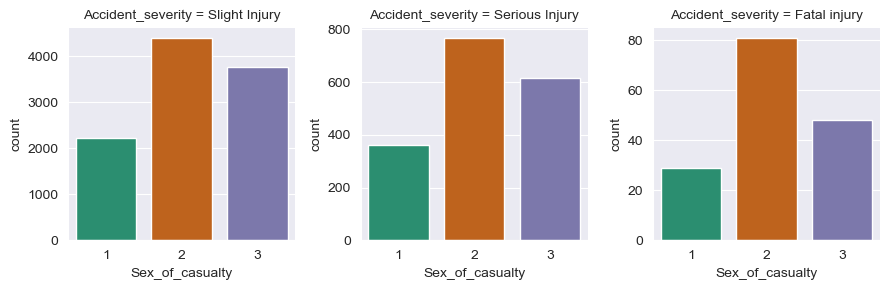

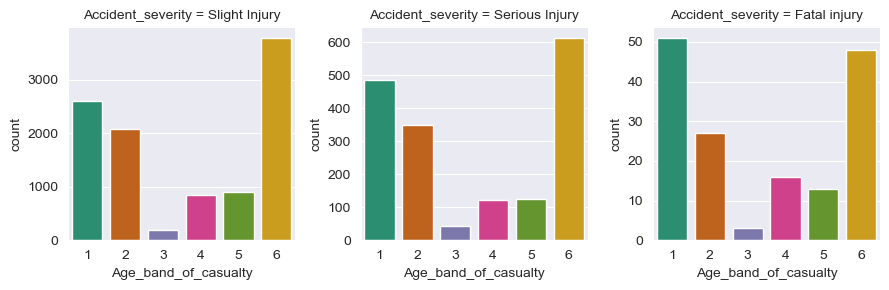

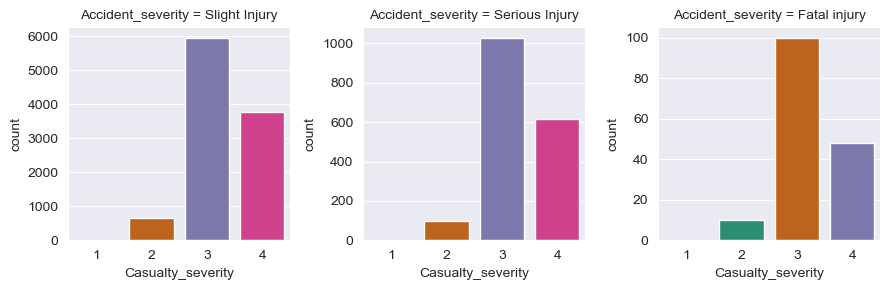

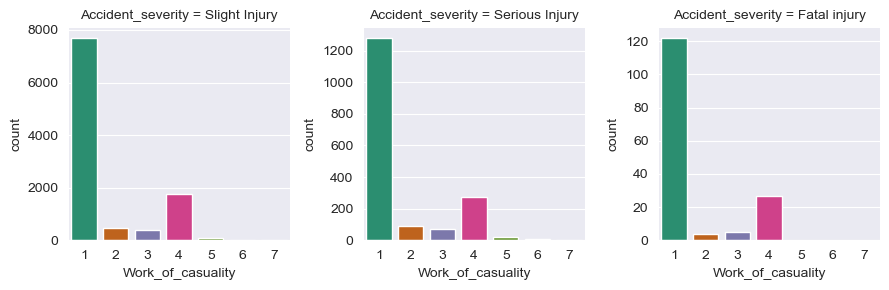

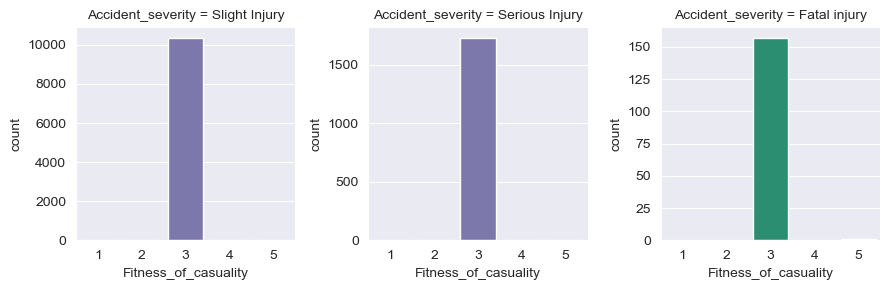

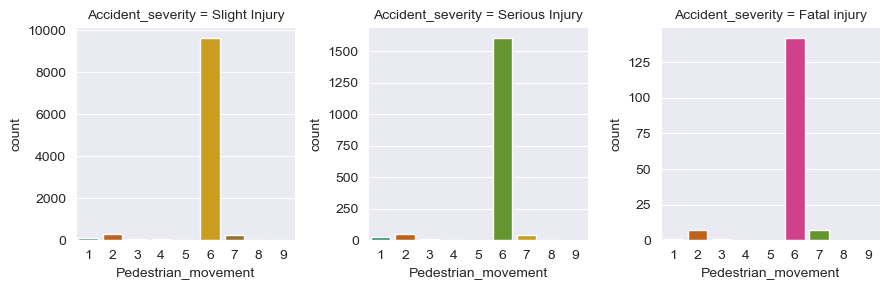

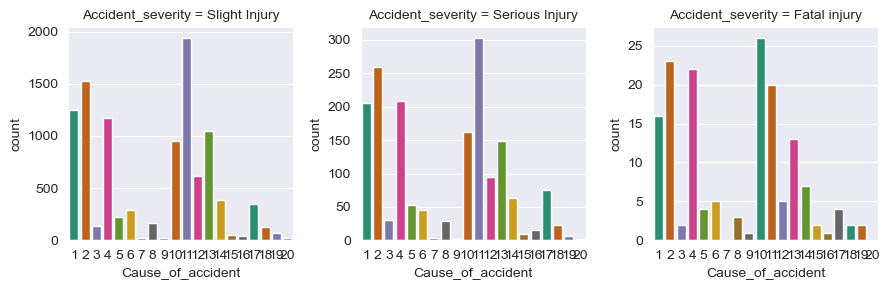

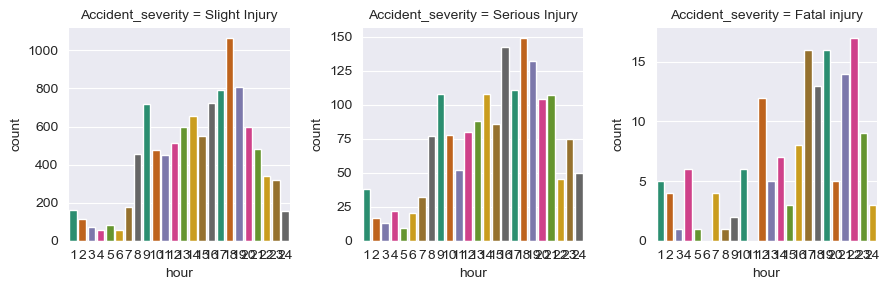

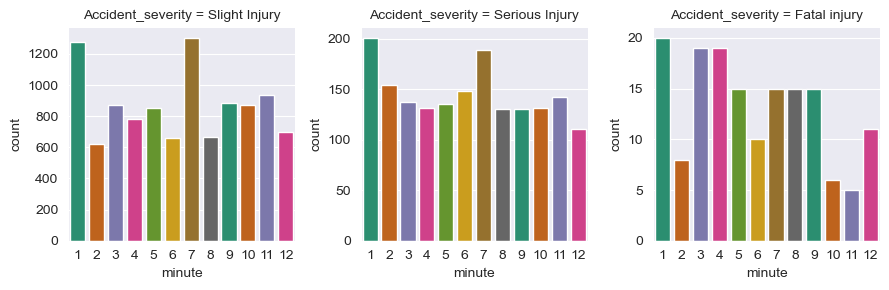

In [56]:
# Visualizing the target variable
for col in df.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(df, col='Accident_severity', aspect=1, sharey=False) # aspect = height/width
    g.map(sns.countplot, col, palette = 'Dark2') # palette = color palette
    plt.show()

Correlation

Columns with NaN values: ['Accident_severity']


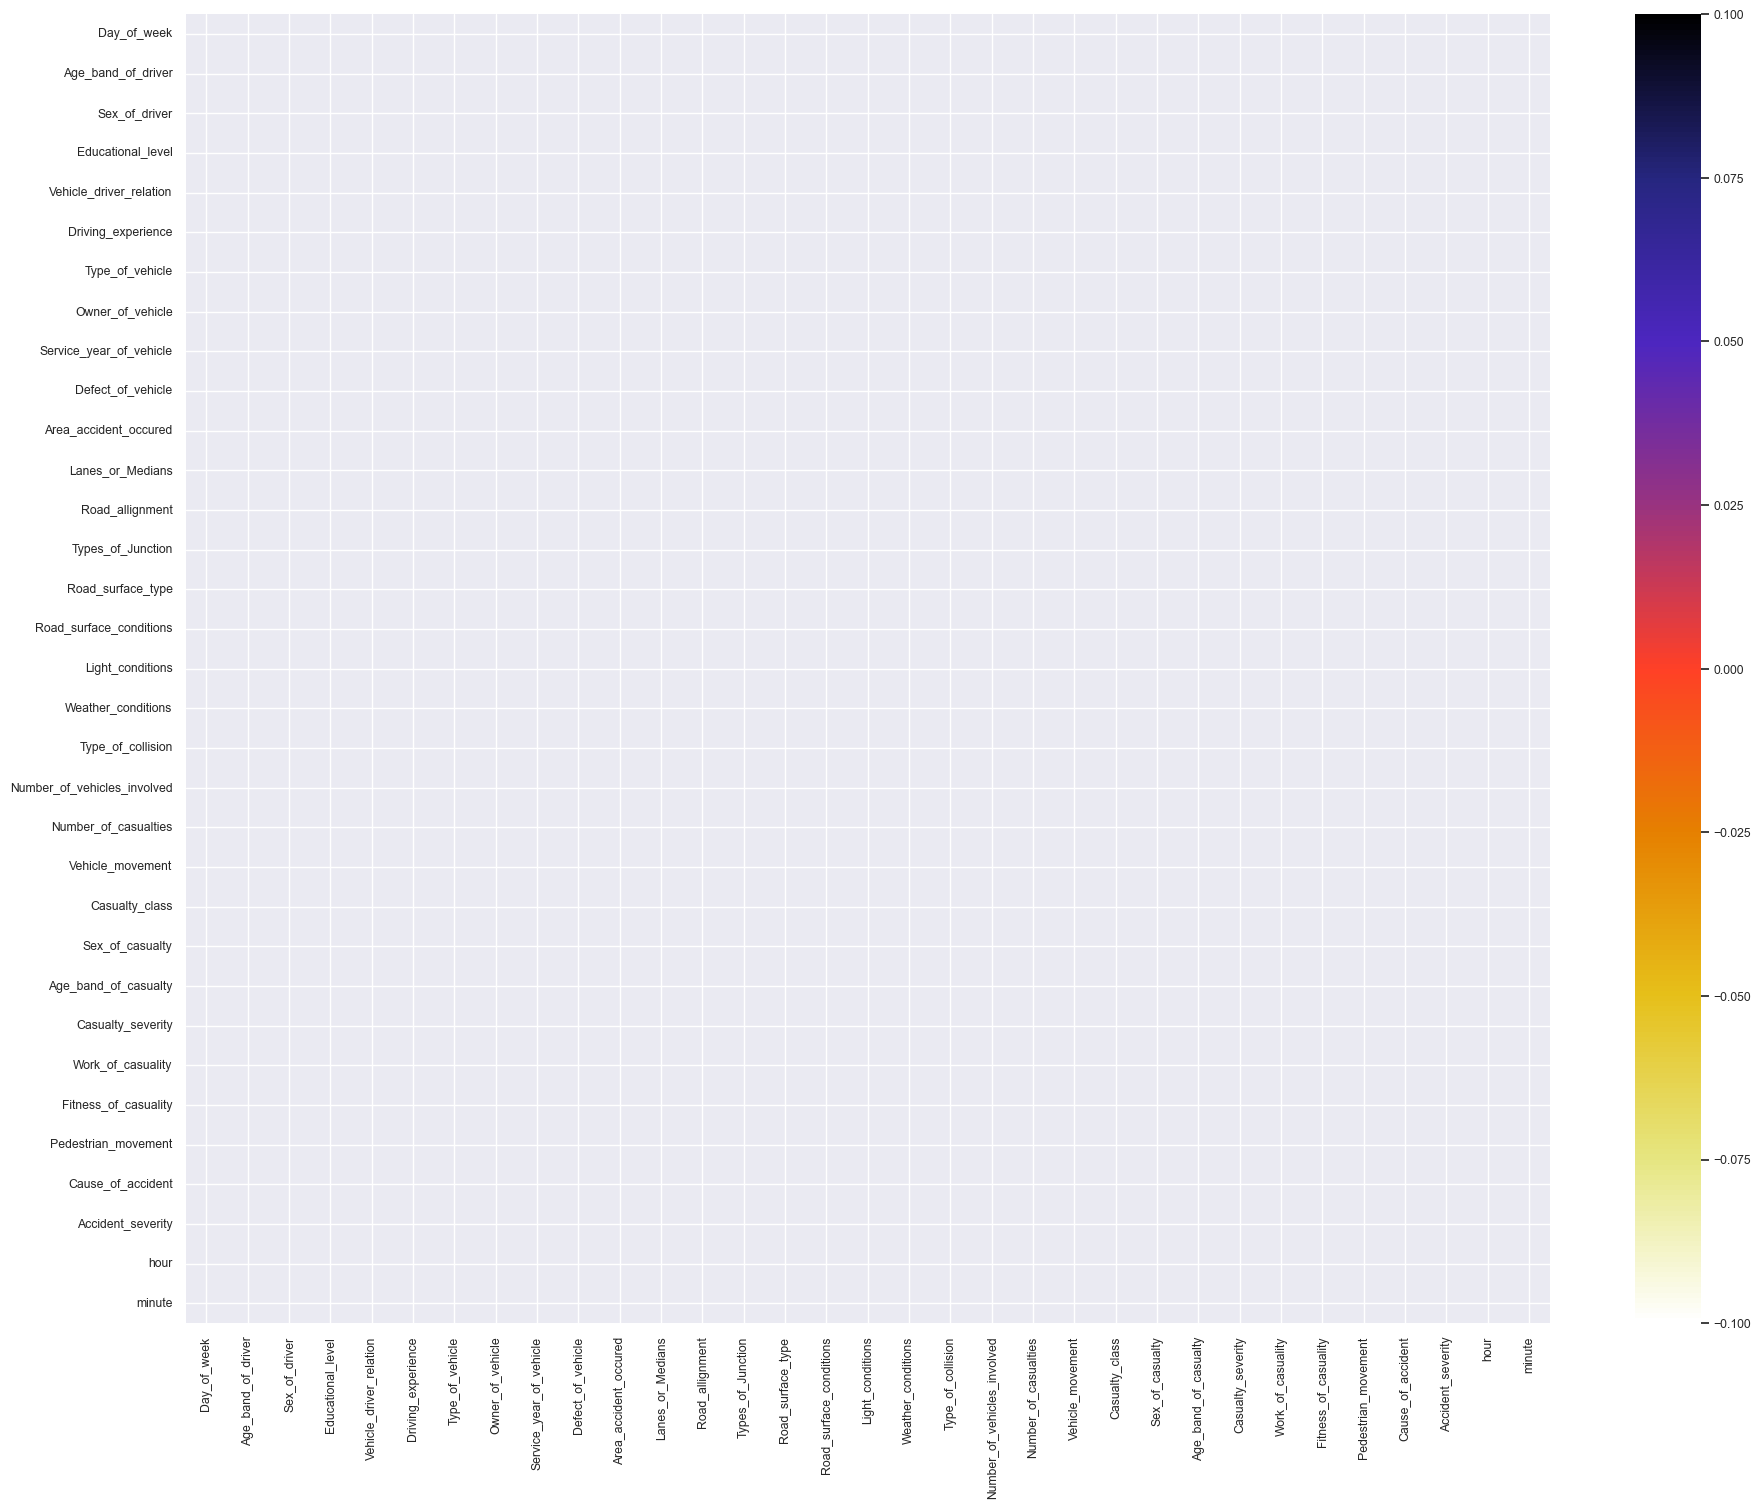

In [65]:
# Assuming 'df' is your DataFrame
# Replace non-numeric values with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Check for NaN values
nan_columns = df_numeric.columns[df_numeric.isna().any()].tolist()
if nan_columns:
    print(f"Columns with NaN values: {nan_columns}")

# Handle NaN values as needed, for example, drop rows with NaN values
df_numeric = df_numeric.dropna()

# Create the correlation heatmap
plt.figure(figsize=(22, 17))
sns.set(font_scale=0.8)
sns.heatmap(df_numeric.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# Display the plot
plt.show()

Columns with NaN values: ['Accident_severity']


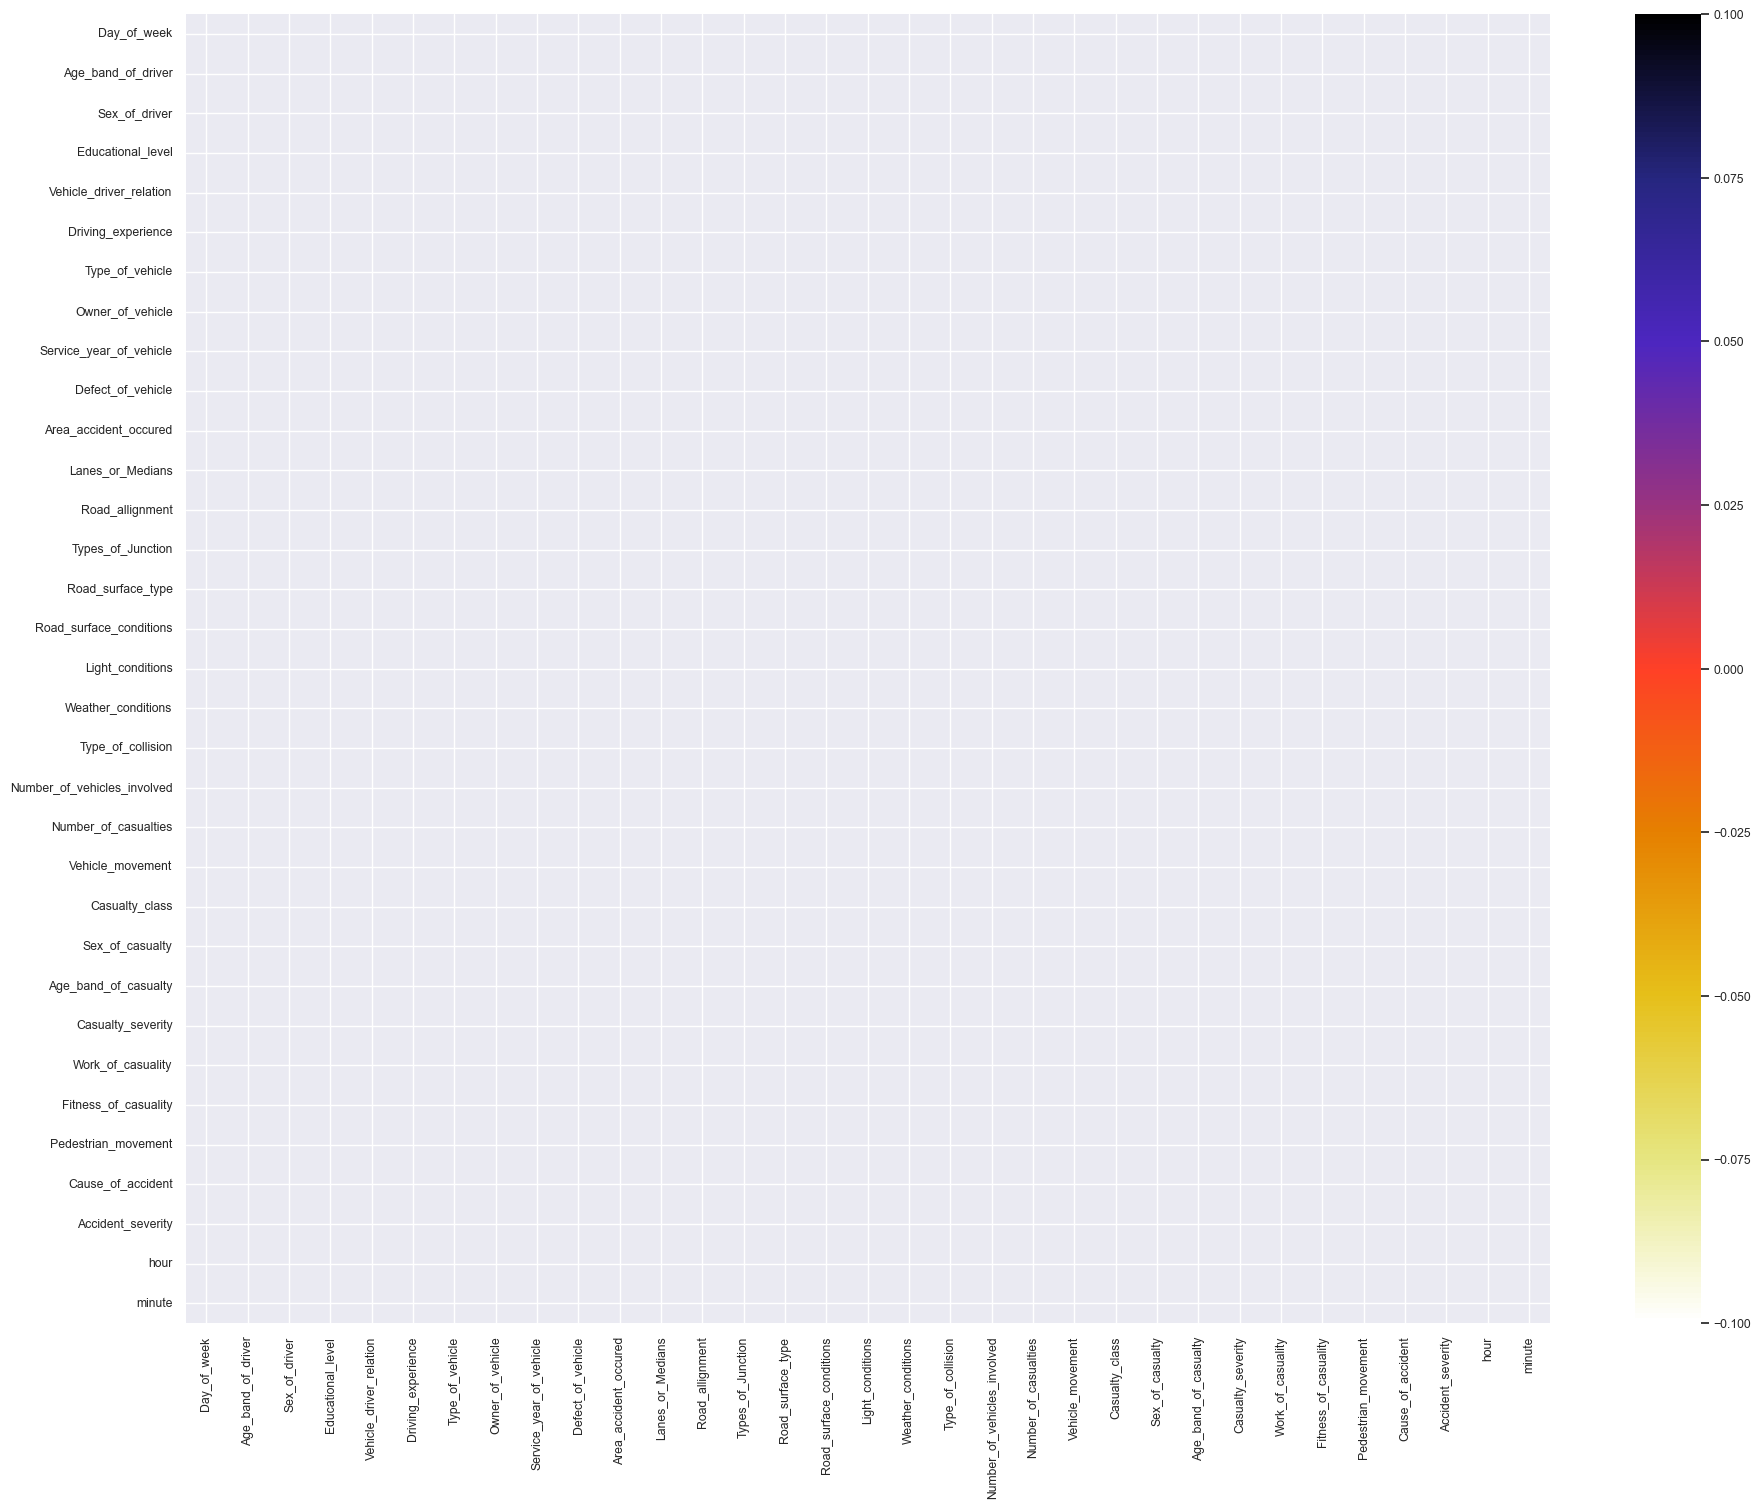

In [69]:
# Assuming 'df' is your DataFrame
# Replace non-numeric values with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Check for NaN values
nan_columns = df_numeric.columns[df_numeric.isna().any()].tolist()
if nan_columns:
    print(f"Columns with NaN values: {nan_columns}")

# Handle NaN values as needed, for example, drop rows with NaN values
df_numeric = df_numeric.dropna()

# Create the correlation heatmap
plt.figure(figsize=(22, 17))
sns.set(font_scale=0.8)
sns.heatmap(df_numeric.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# Display the plot
plt.show()

Upsampling

In [70]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 32) (3695, 32) (8621,) (3695,)


In [71]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 32) (21972,)


In [72]:
y_test

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: Accident_severity, Length: 3695, dtype: object

In [73]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [76]:

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
#from catboost import CatBoostClassifier
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier


import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [77]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB



gbc = GradientBoostingClassifier(random_state = 0, learning_rate=0.45)
rfc = RandomForestClassifier(random_state = 0) 
lr = LogisticRegression(random_state = 0) 
dtc = DecisionTreeClassifier(random_state = 0) 
svc = SVC(random_state = 0) 
extree = ExtraTreesClassifier()
NBC2=GaussianNB()  
NBC1=CategoricalNB()
knn = KNeighborsClassifier(n_neighbors=10)
#CBC=CatBoostClassifier(random_state=42, n_estimators = 50)
#XGBR = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
clf = lgb.LGBMClassifier()
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)

lst = []

for i in(gbc,rfc,dtc,lr,svc,extree,NBC2,NBC1,knn,clf,ada):
    i.fit(X_train, y_train)

    i_pred = i.predict(X_test)

    cm = confusion_matrix(y_test, i_pred)

    cr = classification_report(y_test, i_pred)
    i_acc = round(accuracy_score(y_test, i_pred), 4)

    lst.append(i_acc)

    print(i,':\n','The confusion matrix:\n',cm,'\n')

    print('The classification report:\n',cr,'\n')

    print('-'*60)

GradientBoostingClassifier(learning_rate=0.45, random_state=0) :
 The confusion matrix:
 [[   7    5   40]
 [   4  122  426]
 [  44  316 2731]] 

The classification report:
               precision    recall  f1-score   support

           1       0.13      0.13      0.13        52
           2       0.28      0.22      0.25       552
           3       0.85      0.88      0.87      3091

    accuracy                           0.77      3695
   macro avg       0.42      0.41      0.41      3695
weighted avg       0.76      0.77      0.77      3695
 

------------------------------------------------------------
RandomForestClassifier(random_state=0) :
 The confusion matrix:
 [[   2    8   42]
 [   1   87  464]
 [   3  247 2841]] 

The classification report:
               precision    recall  f1-score   support

           1       0.33      0.04      0.07        52
           2       0.25      0.16      0.19       552
           3       0.85      0.92      0.88      3091

    accuracy  

Checking the accuracy score of various models acsending order:

In [78]:
Table = pd.DataFrame({'Model':['Gradient Boosting Classifier','Random Forest Classifier','Logistic Regression','Decision Tree Classifier','SVC','ExtraTreesClassifier','GaussianNB','CategoricalNB' ,'Knn', 'Lgbm','Ada'],
                     'Acc_Score': lst})

Table.sort_values('Acc_Score', ascending = False)

,Model,Acc_Score
5,ExtraTreesClassifier,0.8143
1,Random Forest Classifier,0.7930
9,Lgbm,0.7811
0,Gradient Boosting Classifier,0.7740
7,CategoricalNB,0.7497
10,Ada,0.6820
2,Logistic Regression,0.6682
4,SVC,0.6127
3,Decision Tree Classifier,0.5388
8,Knn,0.3694


Extrees provides the best accuracy out of all so we proceed with it

In [79]:
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Hyperparameter Tuning

Trial 1

In [80]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    cv=gkf,
)

extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.863004216442197)

Trial 2

In [81]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'n_estimators': range(300, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 300)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

final_model = gsearch.best_estimator_
(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


({'class_weight': 'balanced',
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 400},
 0.9252283140827252)

In [82]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)

In [83]:
y_pred_tuned 

array([3, 3, 3, ..., 3, 3, 3])

Explalinable AI

In [84]:
shap.initjs() # Init JS

In [85]:
X_sample = X_train.sample(100)
X_sample

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,hour,minute
81,1,1,2,5,1,2,1,4,2,3,10,5,7,8,1,1,1,3,2,2,2,3,3,1,2,3,1,3,7,11,20,3
15927,5,3,2,4,1,2,6,1,6,3,13,1,6,2,1,3,4,3,9,1,1,3,4,3,6,4,3,3,6,11,13,12
12681,3,1,2,4,1,2,7,3,3,3,6,5,6,6,1,1,3,3,9,2,3,3,2,2,1,3,1,3,6,1,19,2
16923,2,3,2,3,1,2,3,4,2,3,9,3,2,2,1,1,4,3,2,2,1,3,2,1,1,3,1,3,6,17,19,1
10959,1,2,2,2,1,3,7,4,5,3,7,1,6,2,1,1,3,3,9,1,1,3,1,2,1,3,1,3,6,2,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12035,3,2,2,5,1,3,8,4,4,3,8,5,6,4,1,1,1,3,9,1,3,4,1,2,1,3,1,3,6,5,1,4
17494,6,2,2,5,1,3,1,4,4,3,7,4,6,1,1,1,3,3,9,2,1,3,3,2,2,3,1,3,6,2,20,5
8395,4,1,2,5,1,4,8,1,6,3,7,3,1,1,1,1,4,3,9,2,2,8,1,2,2,3,5,3,6,2,20,7
11635,4,3,2,2,1,4,3,4,4,3,9,6,6,3,1,1,4,3,9,1,1,3,1,1,2,3,1,3,6,10,14,10


In [86]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

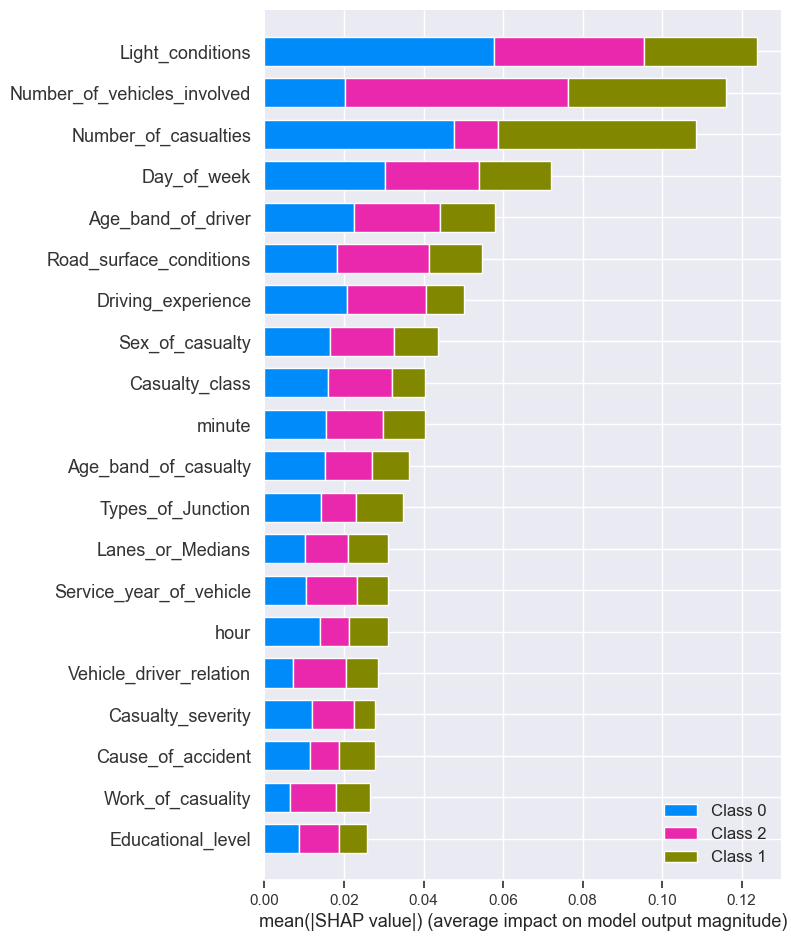

In [87]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

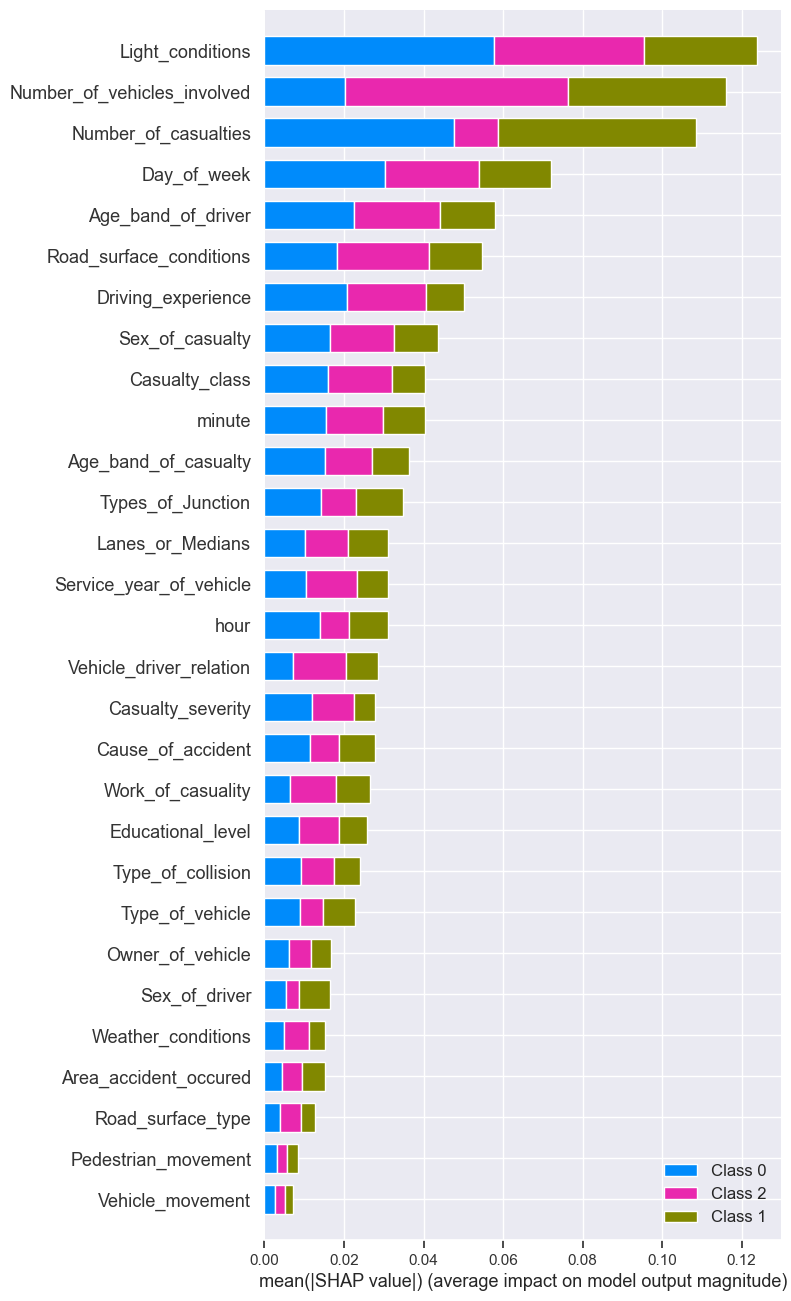

In [88]:
shap.summary_plot(shap_values, X_sample, max_display=29)

In [89]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

In [90]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

3


In [91]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

2


3


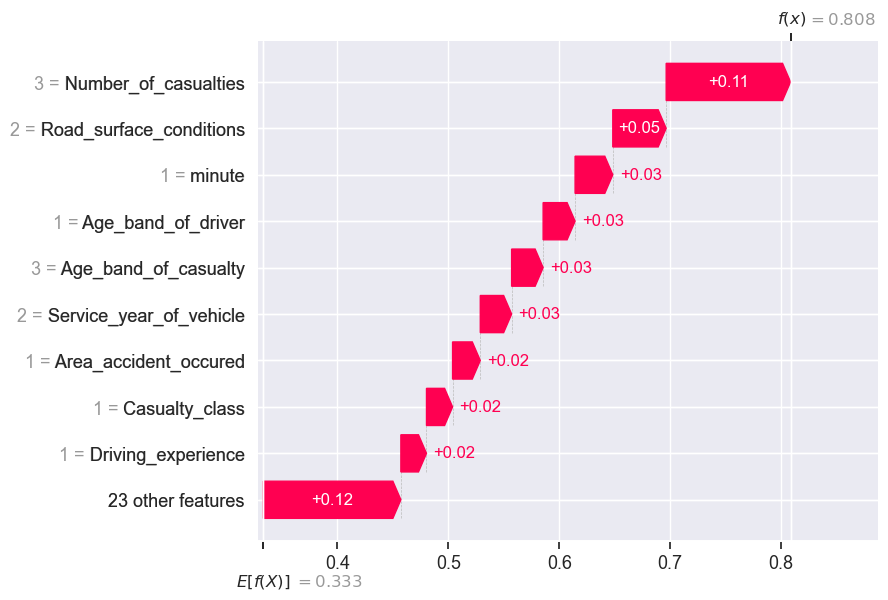

In [92]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

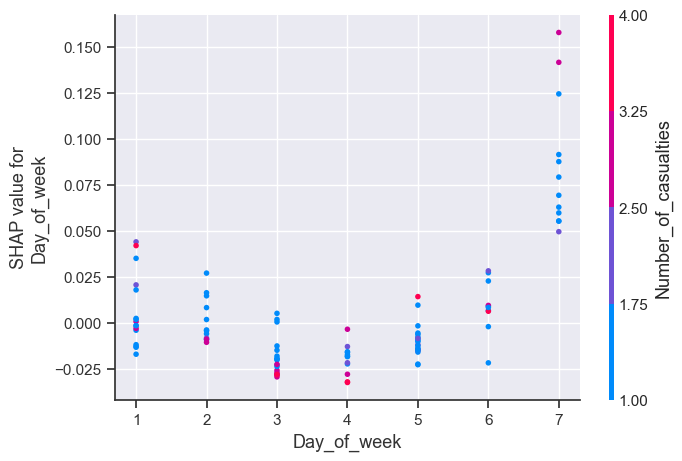

In [93]:
shap.dependence_plot('Day_of_week', shap_values[2], X_sample)

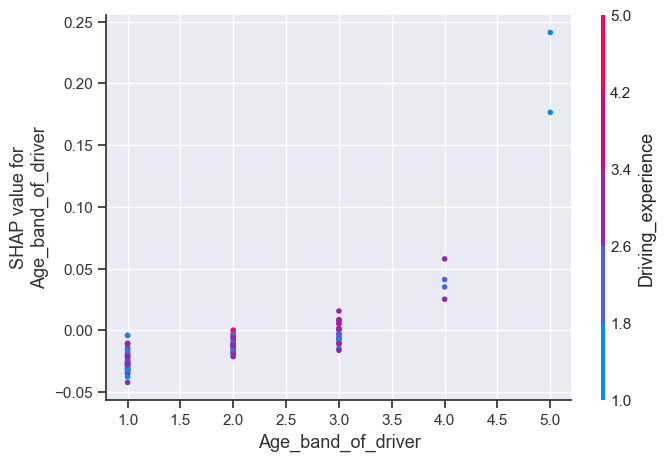

In [94]:
shap.dependence_plot('Age_band_of_driver', shap_values[2], X_sample)

3


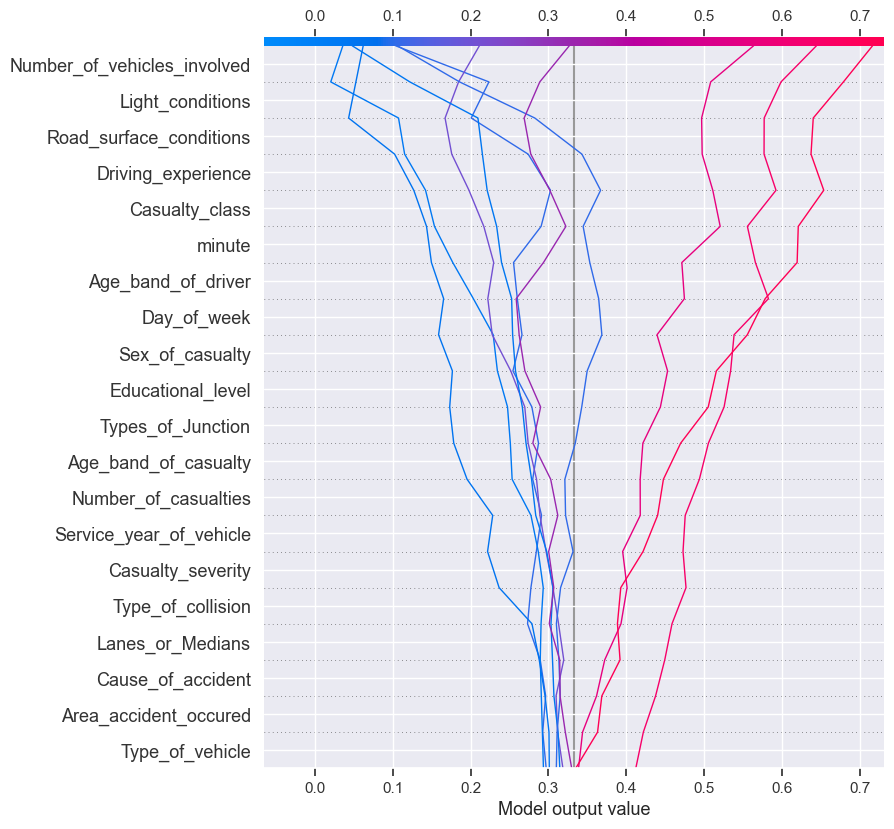

In [95]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())

In [96]:
import joblib
joblib.dump(extree_tuned, 'extree.sav')
extree_tuned

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [98]:
# import joblib
joblib.dump(extree_tuned, 'extree.joblib')

['extree.joblib']

In [99]:
model = joblib.load('extree.joblib')



In [101]:
model.predict(X_test)

array([3, 3, 3, ..., 3, 3, 3])

In [102]:
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 32) (3695, 32) (8621,) (3695,)


In [103]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
# predicting
y_pred = model.predict(X_test)


In [105]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: ", score)

Accuracy:  0.8392422192151556


In [106]:

# getting feature importance
model.feature_importances_


array([0.05468694, 0.0406131 , 0.00923237, 0.03118095, 0.0150305 ,
       0.04661394, 0.05636516, 0.01074118, 0.0364355 , 0.00282722,
       0.05015612, 0.0409352 , 0.02062741, 0.03426449, 0.01237882,
       0.01502512, 0.01854495, 0.01888318, 0.02794246, 0.04626286,
       0.03327488, 0.03909361, 0.02261104, 0.0187025 , 0.02986878,
       0.01498533, 0.0241528 , 0.00324374, 0.01234465, 0.06275385,
       0.08277309, 0.06744829])

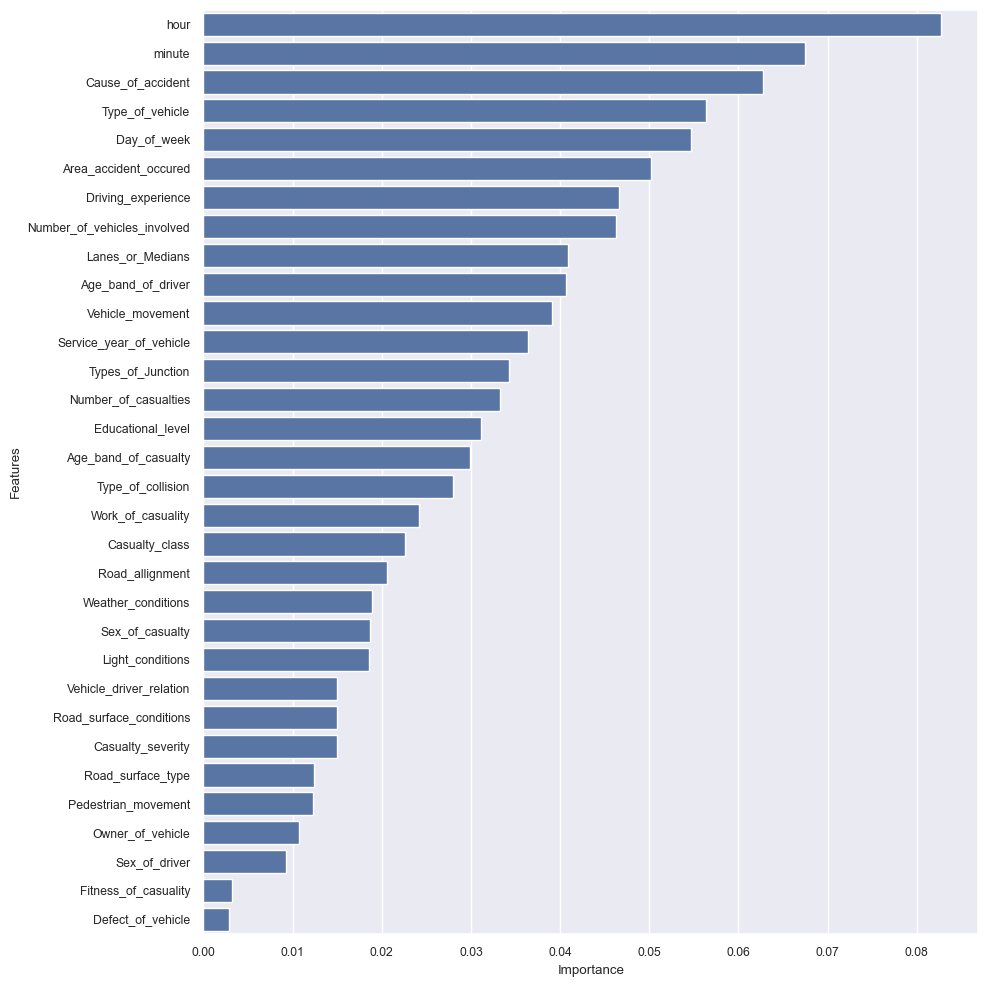

In [107]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = model.feature_importances_
plt.figure(figsize=(10, 12))
sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');

In [108]:
# selecting top 10 features
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['hour',
 'minute',
 'Cause_of_accident',
 'Type_of_vehicle',
 'Day_of_week',
 'Area_accident_occured',
 'Driving_experience',
 'Number_of_vehicles_involved',
 'Lanes_or_Medians',
 'Age_band_of_driver']

In [109]:
# selecting top 10 features
df_top10 = df[top10]
df_top10


,hour,minute,Cause_of_accident,Type_of_vehicle,Day_of_week,Area_accident_occured,Driving_experience,Number_of_vehicles_involved,Lanes_or_Medians,Age_band_of_driver
0,18,2,10,1,2,10,1,2,3,1
1,18,2,17,12,2,7,4,2,5,2
2,18,2,1,6,2,2,1,2,7,1
3,2,3,2,12,4,7,3,2,7,1
4,2,3,17,1,4,5,2,2,7,1
...,...,...,...,...,...,...,...,...,...,...
12311,17,4,11,5,7,6,2,2,5,2
12312,19,1,11,1,4,6,3,2,3,5
12313,14,12,2,2,4,6,3,1,3,3
12314,14,12,6,6,4,7,4,2,5,1


In [110]:

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top10, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)


(8621, 10) (3695, 10) (8621,) (3695,)


In [111]:


# fitting model
model.fit(X_train_new, y_train_new)


RandomForestClassifier()

In [112]:


# predicting
y_pred_new = model.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)


Accuracy:  0.8359945872801082


In [113]:
joblib.dump(model, 'RandomForest.joblib')

['RandomForest.joblib']

In [115]:
model = joblib.load('RandomForest.joblib')
model.predict(X_test_new)

array(['Slight Injury', 'Slight Injury', 'Slight Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)